In [1]:
import logging
import numpy
import numpy as np
import pandas as pd
from math import *
from datetime import datetime
from operator import itemgetter
from zipfile import ZipFile
from io import BytesIO
import pickle
from urllib.request import urlopen

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from numpy import inf
from scipy.stats import kurtosis, skew

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import mean_squared_error



import warnings
warnings.filterwarnings('ignore')

from functions import *
from fair_func import *

In [2]:
from pandas.api.types import CategoricalDtype


In [3]:
import analyser as ans

In [4]:
#!pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

#!pip install PyALE
from PyALE import ale

In [5]:
data = pd.read_csv('RAIdata.csv')

In [6]:
data.shape

(61321, 206)

In [7]:
data["Default"].value_counts()

0.0    46752
1.0    14569
Name: Default, dtype: int64

In [8]:
data.head().T

,0,1,2,3,4
Unnamed: 0,0.000000,1.0000,2.000000,3.000000,4.0000
Age,54.000000,52.0000,28.000000,40.000000,31.0000
AppliedAmount,8505.000000,2230.0000,530.000000,1380.000000,530.0000
DebtToIncome,0.000000,0.0000,0.000000,0.000000,0.0000
ExpectedLoss,0.118622,0.0592,0.048764,0.071894,0.0437
...,...,...,...,...,...
WorkExperience_2To5Years,0.000000,1.0000,1.000000,0.000000,0.0000
WorkExperience_5To10Years,1.000000,0.0000,0.000000,1.000000,0.0000
WorkExperience_LessThan2Years,0.000000,0.0000,0.000000,0.000000,1.0000
WorkExperience_MoreThan25Years,0.000000,0.0000,0.000000,0.000000,0.0000


<div class="alert alert-block alert-success">
<b>Inference:</b>
We can infer that the data has more 0's (False) when it comes to defaulter compared to 1's (True).  
Thus there are more non-defaulters than defaulters.
</div>

In [9]:
#0 if favourable [false, default = false]
#1 if unfavourable [true, default = True]
fav=0
unfav=int(not fav)

In [10]:
a='Gender_0.0' #Male
b='Education_5.0' #Higher Ed
c='Young' # Age group
d='HomeOwnershipType_1.0' #Owner 
e='HomeOwnershipType_8.0' #Mortgages
f='EmploymentStatus_5.0' #Entrepreneur
g="Tenant" #Tenant

i='LanguageCode_1' #Estonian
j='LanguageCode_2' #English
k="NrOfDependantslessthan3" #No of dependent less than 10 years
l='MaritalStatus_1.0' #Married
m='MaritalStatus_3.0' #Single
n='MaritalStatus_4.0' #Divorced

p="WrExLess10" #Work ex less than 10 years
q="WrExLess5" #Work ex less than 5 years


In [11]:
datatest=data

In [12]:
datatest['MonthlyPayment'].fillna((datatest['MonthlyPayment'].mean()), inplace=True)
datatest['ExpectedLoss'].fillna((datatest['ExpectedLoss'].mean()), inplace=True)
datatest['ProbabilityOfDefault'].fillna((datatest['ProbabilityOfDefault'].mean()), inplace=True)
datatest['DebtToIncome'].fillna((datatest['DebtToIncome'].mean()), inplace=True)
datatest['FreeCash'].fillna((datatest['FreeCash'].mean()), inplace=True)
datatest['LossGivenDefault'].fillna(0, inplace=True)

In [13]:
target=['Default']

In [14]:
x=datatest.drop(columns=['Age', 'Default'])
y=datatest['Default']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=6666)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [17]:
f_imp = pd.Series(clf.feature_importances_, index=X_train.columns)
f_imp = pd.DataFrame(f_imp, columns=['coeff'])
f_imp = f_imp.reset_index()
f_imp = f_imp.sort_values('coeff', ascending=False)

In [18]:
f_imp[:20]

,index,coeff
106,MaritalStatus_4.0,0.092266
10,IncomeFromPrincipalEmployer,0.090500
149,OccupationArea_-1.0,0.090272
5,FreeCash,0.082409
72,EmploymentStatus_3.0,0.073011
3,ExpectedLoss,0.064394
0,Unnamed: 0,0.056608
2,DebtToIncome,0.054731
17,MonthlyPayment,0.046094
70,EmploymentStatus_1.0,0.044665


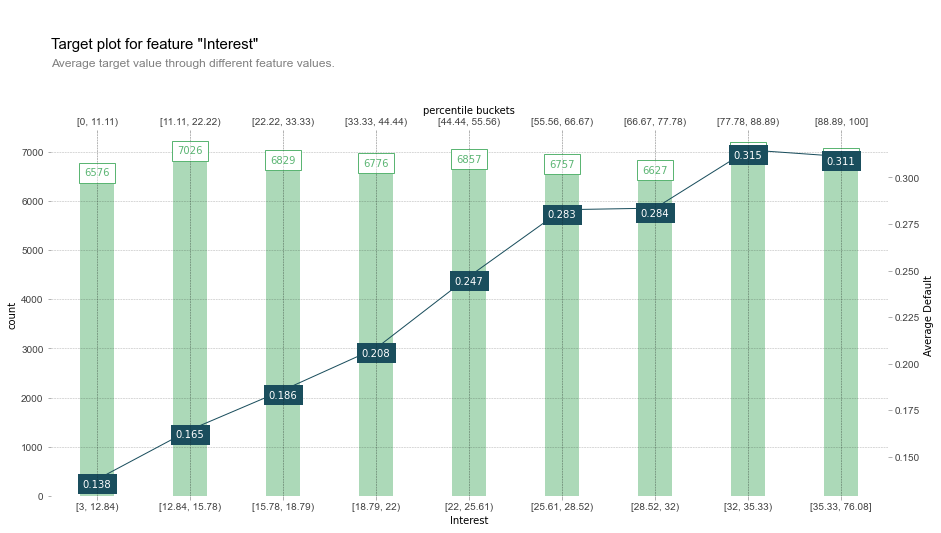

In [19]:
fig, axes, summary_df = info_plots.target_plot(
df=datatest, feature='Interest', feature_name='Interest', target='Default', show_percentile=True)

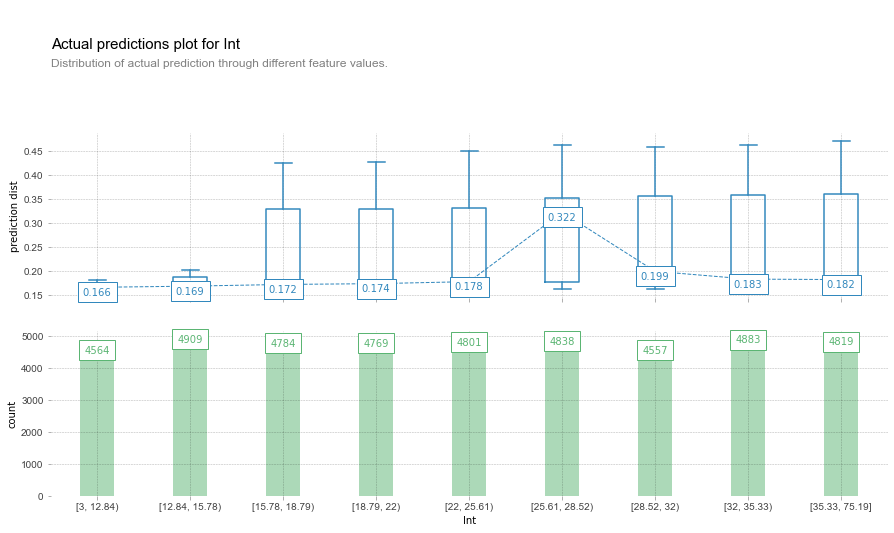

In [20]:
fig, axes, summary_df = info_plots.actual_plot(
model=clf, X=X_train, feature='Interest', feature_name='Int',predict_kwds={})

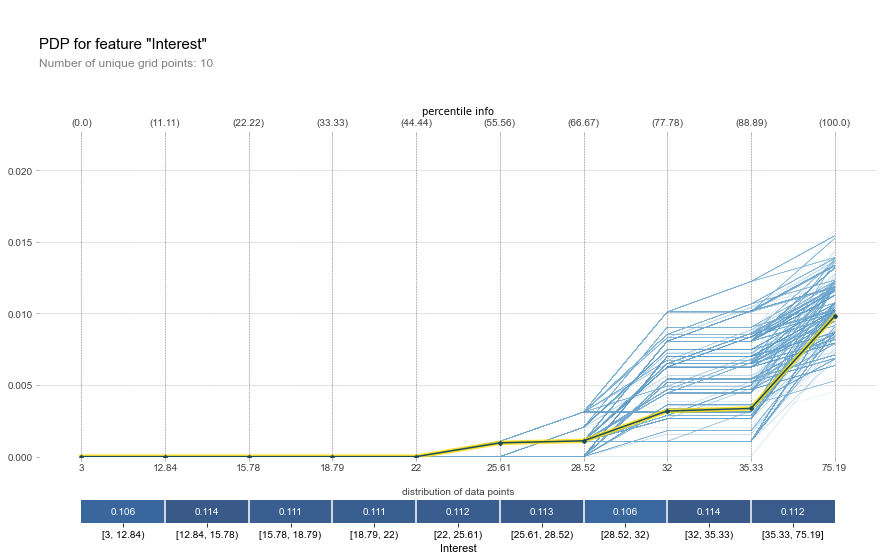

In [21]:
pdp_limit = pdp.pdp_isolate(
model=clf, dataset=X_train, model_features=X_train.columns, feature='Interest')
fig, axes = pdp.pdp_plot(
pdp_limit, 'Interest', frac_to_plot=0.2, plot_lines=True, x_quantile=True, show_percentile=True, plot_pts_dist=True)

In [ ]:
#ALE

In [ ]:
class clf_dummy():
    def predict(X_train):
        return(clf.predict_proba(X_train)[:, 1])

In [ ]:
feat_eff = ale(X=X_train, model=clf_dummy, feature=['Interest'], grid_size=10)


In [23]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
data_stats = X_test.describe(include='all')  # take the describtion of dataset
data_stats1 = data_stats.drop(['count','std'])   # drop the column which u don't require

In [24]:
data_stats1

,Unnamed: 0,AppliedAmount,DebtToIncome,ExpectedLoss,LiabilitiesTotal,FreeCash,IncomeFromChildSupport,IncomeFromFamilyAllowance,IncomeFromLeavePay,IncomeFromPension,...,VerificationType_2.0,VerificationType_3.0,VerificationType_4.0,WorkExperience_10To15Years,WorkExperience_15To25Years,WorkExperience_2To5Years,WorkExperience_5To10Years,WorkExperience_LessThan2Years,WorkExperience_MoreThan25Years,Young
mean,30696.102028,2368.526077,10.132004,0.091679,422.225502,122.166902,3.456107,7.076,5.506985,9.530467,...,0.027831,0.070066,0.431429,0.065011,0.072023,0.298364,0.302495,0.183291,0.078817,0.566397
min,0.000000,31.955800,0.000000,0.000000,0.000000,-106.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15267.000000,530.000000,0.000000,0.046424,125.000000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30668.000000,1590.000000,0.000000,0.083000,327.530000,0.000000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,45975.000000,3185.000000,16.460000,0.122141,568.370000,127.730000,0.000000,0.000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,61320.000000,10630.000000,79.960000,0.609245,17300.000000,11284.440000,1200.000000,1323.000,2200.000000,2600.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
col_val = ['Interest']

In [26]:
def get_data(d):
    return d[:, 0]

In [27]:
analyser = ans.Analyser(clf, data_stats1, clf.predict_proba, get_data)

In [28]:
res = list(analyser.run_on_features(list(col_val), 100, multicore=False))

Interest


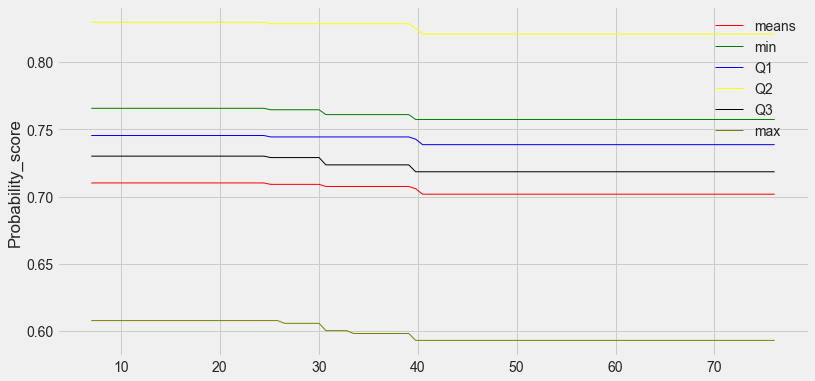

In [29]:
%matplotlib inline
plt.style.use('seaborn-white')

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns
from matplotlib.pyplot import *

for feature, result in res:
    print(feature)
    points = [r[0] for r in result]
    means = [r[1][0] for r in result]
    mins = [r[1][1] for r in result]
    q1st = [r[1][2] for r in result]
    q2nd = [r[1][3] for r in result]
    q3rd = [r[1][4] for r in result]
    maxs = [r[1][5] for r in result]
    
    plt.figure(figsize = (12,6))
    
    plt.plot(points, mins,linewidth=1,color='red')
    plt.plot(points, means,linewidth=1,color='green')
    plt.plot(points, q1st ,linewidth=1,color='blue')
    plt.plot(points, q2nd ,linewidth=1,color='yellow')
    plt.plot(points, q3rd ,linewidth=1,color='black')
    plt.plot(points, maxs ,linewidth=1,color='olive')
    plt.ylabel("Probability_score")
 
    plt.legend(["means", "min", 'Q1','Q2','Q3','max'], loc=1)

    
    plt.show()

In [30]:
import shap

In [31]:
from shap import *

In [32]:
rf_prob_1 = lambda x: clf.predict_proba(x)[:,1]

In [37]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

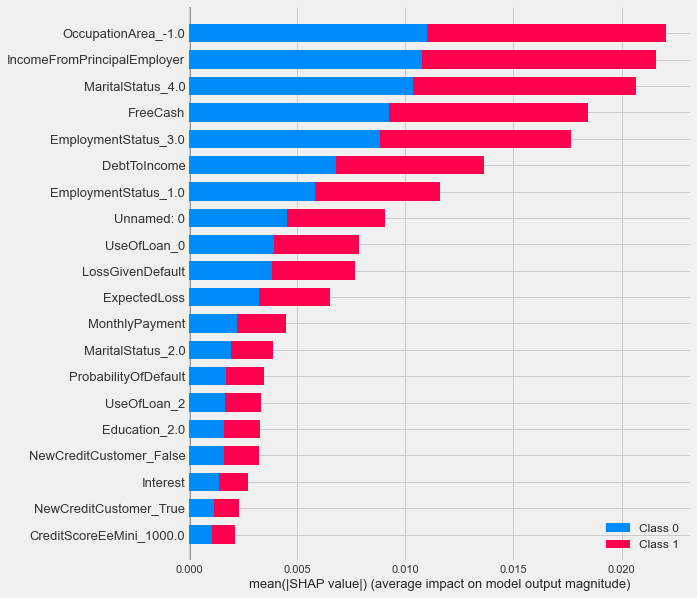

In [38]:
explainer = shap.TreeExplainer(clf)
shap_values = shap.TreeExplainer(clf).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

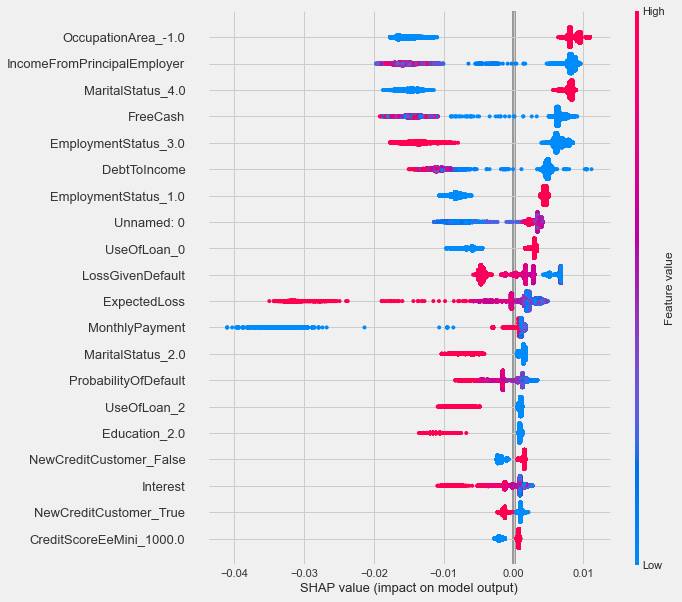

In [39]:
shap.summary_plot(shap_values[0], X_train)

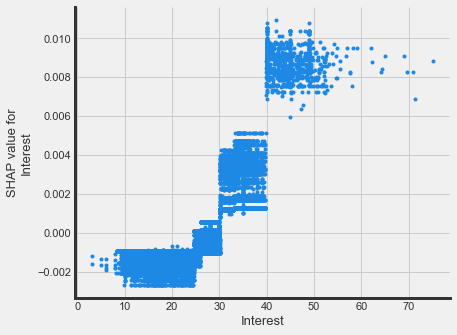

In [40]:
shap.dependence_plot("Interest", shap_values[1], X_train, interaction_index=None)

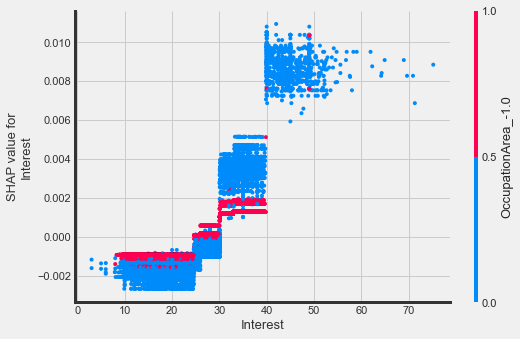

In [41]:
shap.dependence_plot('Interest', shap_values[1], X_train)

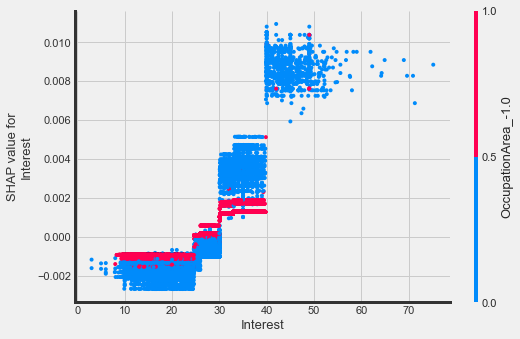

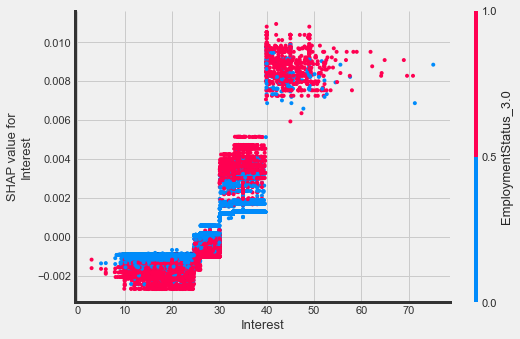

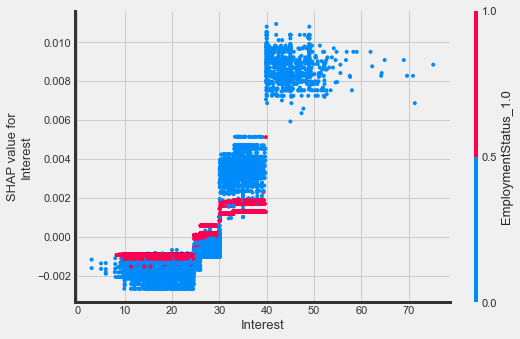

In [42]:
inds = shap.approximate_interactions("Interest", shap_values[1], X_train)

for i in range(3):
    shap.dependence_plot("Interest", shap_values[1], X_train, interaction_index=inds[i])

In [43]:
j=pd.DataFrame(f_imp[:20])
p=j['index'].to_list()

In [44]:
y_train[:2000,].shape

(2000,)

In [48]:
clf2 = RandomForestClassifier().fit(X_train.loc[:2000,p], y_train.loc[:2000,])

In [ ]:
shap_interaction_values = shap.TreeExplainer(clf2).shap_interaction_values(X_train.loc[:2000,p])

In [ ]:
shap.summary_plot(shap_interaction_values, X_train.loc[:2000,p])

In [ ]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
clf.predict_proba(data_for_prediction_array)

In [ ]:
explainer = shap.TreeExplainer(clf)
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [ ]:
#shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction, link="logit")

In [ ]:
explainer.expected_value

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_train.columns)

In [ ]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_train.columns, feature_order='hclust')

In [ ]:
# https://slundberg.github.io/shap/notebooks/plots/decision_plot.html
# https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b

This method approximates the Shapley values by iterating through permutations of the inputs.

This is a model agnostic explainer that gurantees local accuracy (additivity) by iterating completely
through an entire permutatation of the features in both forward and reverse directions. If we do this
once, then we get the exact SHAP values for models with up to second order interaction effects. We can
iterate this many times over many random permutations to get better SHAP value estimates for models
with higher order interactions. This sequential ordering formulation also allows for easy reuse of
model evaluations and the ability to effciently avoid evaluating the model when the background values
for a feature are the same as the current input value. We can also account for hierarchial data
structures with partition trees, something not currently implemented for KernalExplainer or SamplingExplainer.

In [ ]:
explainer = shap.explainers.Permutation(clf.predict_proba, X_test)
shap_values = explainer(X_test[:100])

In [34]:
# get just the explanations for the positive class
shap_values2 = shap_values[...,0]
shap_values3 = shap_values[...,1]

NameError: name 'shap_values' is not defined

The SHAP value of a feature represents the impact of the evidence provided by that feature on the model's
output. The waterfall plot is designed to visually display how the SHAP values (evidence) of each feature
move the model output from our prior expectation under the background data distribution, to the final model
prediction given the evidence of all the features. Features are sorted by the magnitude of their SHAP values
with the smallest magnitude features grouped together at the bottom of the plot when the number of features
in the models exceeds the max_display parameter

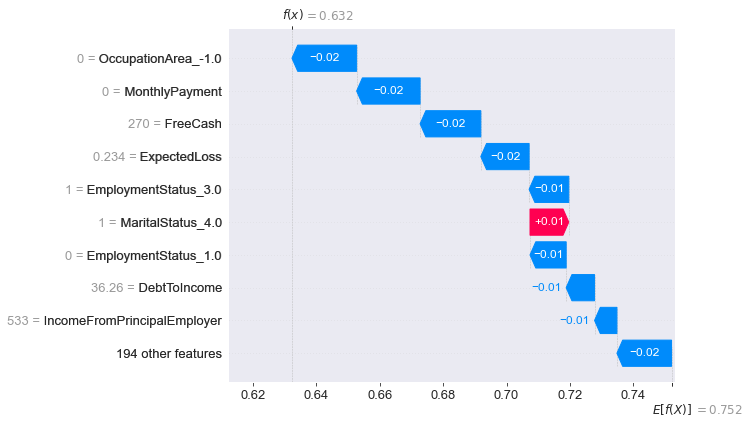

In [215]:
shap.plots.waterfall(shap_values2[19]) #5, 19, 81, 

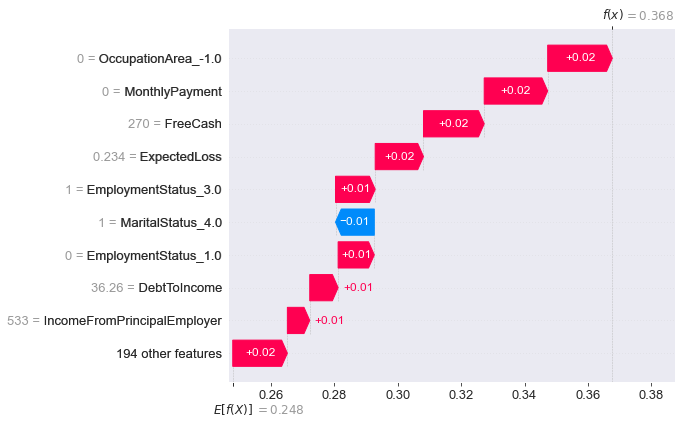

In [216]:
shap.plots.waterfall(shap_values3[19]) #5, 19, 81, 

In [ ]:
#https://gsarantitis.wordpress.com/2019/03/18/interpretable-machine-learning-revisited-partial-dependence-plots/

In [ ]:
#https://www.dataminingapps.com/2019/05/five-model-agnostic-interpretability-checks-to-look-at-before-deploying/

In [ ]:
#!pip install interpret

In [ ]:
import interpret

In [ ]:
from interpret.glassbox import *

In [ ]:
from interpret.glassbox import ExplainableBoostingClassifier

In [ ]:
ebm = ExplainableBoostingClassifier()
ebm.fit(X_train, y_train)

In [ ]:
from interpret import show

In [ ]:
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

In [ ]:
ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
show(ebm_local)

In [ ]:
from interpret.perf import ROC

ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA()
rf = RandomForestClassifier()

blackbox_model = rf #Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

In [ ]:
from interpret import show
from interpret.perf import ROC

blackbox_perf = ROC(blackbox_model.predict_proba).explain_perf(X_test, y_test, name='Blackbox')
show(blackbox_perf)


In [ ]:
from interpret.blackbox import LimeTabular
from interpret import show

#Blackbox explainers need a predict function, and optionally a dataset
lime = LimeTabular(predict_fn=blackbox_model.predict_proba, data=X_train, random_state=1)

#Pick the instances to explain, optionally pass in labels if you have them
lime_local = lime.explain_local(X_test[:5], y_test[:5], name='LIME')

show(lime_local)


In [ ]:
from interpret.blackbox import ShapKernel
import numpy as np
feature_names = list(X_test.columns)


background_val = np.median(X_train, axis=0).reshape(1, -1)
shap = ShapKernel(predict_fn=blackbox_model.predict_proba, data=background_val, feature_names=feature_names)
shap_local = shap.explain_local(X_test[:5], y_test[:5], name='SHAP')
show(shap_local)

In [ ]:
from interpret.blackbox import MorrisSensitivity



sensitivity = MorrisSensitivity(predict_fn=blackbox_model.predict_proba, data=X_train)
sensitivity_global = sensitivity.explain_global(name="Global Sensitivity")

show(sensitivity_global)

In [ ]:
sensitivity_global.selector

In [ ]:
from interpret.blackbox import PartialDependence

pdp = PartialDependence(predict_fn=blackbox_model.predict_proba, data=X_train)
pdp_global = pdp.explain_global(name='Partial Dependence')

show(pdp_global)

In [ ]:
#https://nbviewer.jupyter.org/github/interpretml/interpret/blob/master/examples/python/notebooks/Explaining%20Blackbox%20Classifiers.ipynb

In [ ]:
show([blackbox_perf, lime_local, shap_local, sensitivity_global, pdp_global])

https://nbviewer.jupyter.org/github/interpretml/interpret/blob/master/examples/python/notebooks/Explaining%20Blackbox%20Classifiers.ipynb

In [ ]:
#!pip install pygam

In [ ]:
import pygam

In [ ]:
from pygam import LinearGAM, s, f
from pygam import LogisticGAM

In [204]:
j=pd.DataFrame(f_imp[:20])
p=j['index'].to_list()

In [ ]:
#gam = LogisticGAM().fit(X_train, y_train)
gam = LogisticGAM().fit(X_train.loc[:,p], y_train)

In [ ]:
gam.accuracy(X_train.loc[:,p], y_train)

In [ ]:
gam.accuracy(X_test.loc[:,p], y_test)

In [ ]:
gam.summary()

In [ ]:
titles=X_train.columns.to_list()

for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.rcParams['figure.figsize'] = (10, 6)

    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(titles[i]))
    plt.show()

In [ ]:
#CF

In [205]:
X_train.loc[:,p].columns

Index(['OccupationArea_-1.0', 'MaritalStatus_4.0', 'FreeCash',
       'EmploymentStatus_1.0', 'EmploymentStatus_3.0', 'DebtToIncome',
       'IncomeFromPrincipalEmployer', 'LossGivenDefault', 'MonthlyPayment',
       'ExpectedLoss', 'UseOfLoan_2', 'UseOfLoan_0', 'ProbabilityOfDefault',
       'VerificationType_3.0', 'CreditScoreEeMini_1000.0', 'Rating_HR',
       'MaritalStatus_2.0', 'MaritalStatus_3.0', 'Interest', 'WrExLess10'],
      dtype='object')

In [236]:
clf2 = RandomForestClassifier(random_state=66).fit(X_train.loc[:,p], y_train)

In [ ]:
#!pip install ceml

In [ ]:
from ceml.sklearn import generate_counterfactual

In [ ]:
x = X_test.loc[1,p]
print("Prediction on x: {0}".format(clf2.predict([x])))

In [ ]:
x.values

In [ ]:
 # Compute counterfactual
print("\nCompute counterfactual ....")
print(generate_counterfactual(clf2, x.values, y_target=0, features_whitelist=None))

In [ ]:
5.92000000e-02-6.21542188e-02

In [ ]:
print(generate_counterfactual(clf2, x.values, y_target=1, features_whitelist=None))

In [ ]:
# Feature 1
original_value = 1.00000000e+00
CF_value = 1.00000141e+00
print ('Delta: ', original_value-CF_value)

In [ ]:
# Feature 2
original_value = 1.00000000e+00
CF_value = 9.99985689e-01
print ('Delta: ', original_value-CF_value)

In [ ]:
# Feature 8
original_value = 4.29111556e-01
CF_value = 3.87700951e-01
print ('Delta: ', original_value-CF_value)

In [ ]:
x.values.shape

In [172]:
test_list = [11, 11, 27, 30, 30, 30, 36, 40, 11, 53 ]

In [173]:
pd.qcut(test_list, 5, duplicates='drop').value_counts()

(10.999, 28.8]    4
(28.8, 30.0]      3
(30.0, 36.8]      1
(36.8, 53.0]      2
dtype: int64

In [237]:
score = pd.DataFrame(clf2.predict_proba(X_test.loc[:,p])[:,0])
ytest = pd.DataFrame(y_test)
ytest = ytest.reset_index(drop=True)
view = pd.concat([ytest, score], axis=1)
view.columns = ['Default', 'Score']
view['Score2']=view['Score']*100

In [238]:
def ret_tag(val):
    for i in range(10):
        if val in categories[i]:
            return tags[i]
        
def zero_list_maker(n):
    list_of_zeros = [0] * n
    return list_of_zeros

In [239]:
i=5
cuts_by_quantile = pd.qcut(view['Score2'], 11, duplicates='drop') #11, duplicates='drop'

toplt = cuts_by_quantile.value_counts().index.categories.mid
categories = cuts_by_quantile.value_counts().index.categories
left_bounds = categories.left
right_bounds = categories.right
tags = range(1, 11)

In [458]:
cuts_by_quantile.value_counts()#/len(view['Score2'])

(97.5, 100.0]       3343
(89.4, 94.0]        1897
(-0.001, 41.0]      1726
(54.0, 64.0]        1693
(71.339, 78.667]    1675
(84.152, 89.4]      1673
(78.667, 84.152]    1670
(41.0, 54.0]        1664
(64.0, 71.339]      1607
(94.0, 97.5]        1449
Name: Score2, dtype: int64

In [459]:
def bar_width_per_quantile(view, label_filter):
    view_filtered = view[view['Default'] == label_filter]
    view_filtered['tag'] = view_filtered['Score2'].map(lambda x: ret_tag(x))
    len_view_filtered = len(view_filtered)
    view_filtered['ID']=view_filtered.index
    count_pertag_filtered = view_filtered[['ID', 'tag']].groupby(['tag']).count().rename(columns={'ID': 'Count'})
    count_pertag_filtered['perc'] = count_pertag_filtered['Count'] / len_view_filtered * 100
    sc = count_pertag_filtered['perc'].tolist()
    sc = zero_list_maker(10 - len(sc)) + sc #10
    return sc

In [460]:
def bar_width_per_quantile2(view, label_filter):
    view_filtered = view[view['Default'] == label_filter]
    view_filtered['tag'] = view_filtered['Score2'].map(lambda x: ret_tag(x))
    len_view_filtered = len(view_filtered)
    view_filtered['ID']=view_filtered.index
    count_pertag_filtered = view_filtered[['ID', 'tag']].groupby(['tag']).count().rename(columns={'ID': 'Count'})
    count_pertag_filtered['perc'] = count_pertag_filtered['Count'] / len(view) * 100
    sc = count_pertag_filtered['perc'].tolist()
    sc = zero_list_maker(10 - len(sc)) + sc #10
    return sc

In [461]:
sc1 = bar_width_per_quantile2(view, 1)
sc0 = bar_width_per_quantile2(view, 0)

In [462]:
name = [str(left_bounds[i])+'-'+str(right_bounds[i]) for i in range(10)] #10

In [463]:
data_p = [(name[i], sc1[i], sc0[i]) for i in range(10)] #10

In [464]:
df = pd.DataFrame(columns=["Range","Label: 1", "Label 0"], 
                  data=data_p)

In [466]:
pal = sns.color_palette("RdYlBu", len(df['Range']))

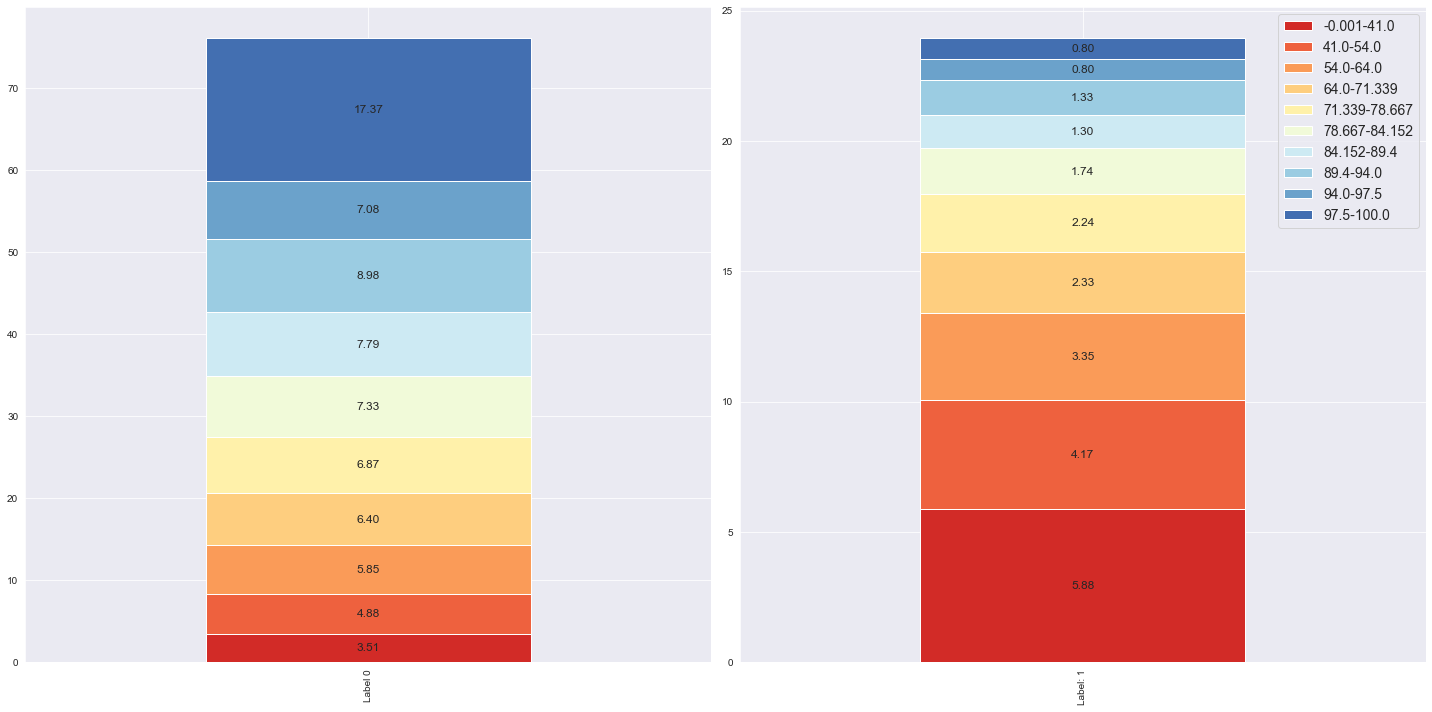

In [468]:
#fig = plt.figure() # Create matplotlib figure

#plt.rcParams["figure.figsize"] = (10,5)
#plt.subplot(1, 2, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))



margin = 0.05
width = (1.-2.*margin)/2
chart = df.set_index('Range').drop(columns=['Label: 1'])
chart2 = df.set_index('Range').drop(columns=['Label 0'])



chart.T.plot.bar(stacked=True, color = pal, grid=True, ax=ax1, width=width, legend=False)
for rect in ax1.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.2f}'  
    
    label_x = x + width/2
    label_y = (y + height/2)

    ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)


chart2.T.plot.bar(stacked=True, color = pal, grid=True, ax=ax2, width=width, legend=False)
for rect in ax2.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.2f}'  
    
    label_x = x + width/2
    label_y = (y + height/2)

    ax2.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)

#ax1.legend(patches, labels, loc='upper left', fontsize=10)
#ax2.legend(patches, labels, loc='upper right', fontsize=14)




    

plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()

In [ ]:
# Option 2

In [469]:
sc1 = bar_width_per_quantile(view, 1)
sc0 = bar_width_per_quantile(view, 0)

In [470]:
name = [str(left_bounds[i])+'-'+str(right_bounds[i]) for i in range(10)] #10

In [471]:
data_p = [(name[i], sc1[i], sc0[i]) for i in range(10)] #10

In [472]:
df = pd.DataFrame(columns=["Range","Label: 1", "Label 0"], 
                  data=data_p)

In [473]:
pal = sns.color_palette("RdYlBu", len(df['Range']))

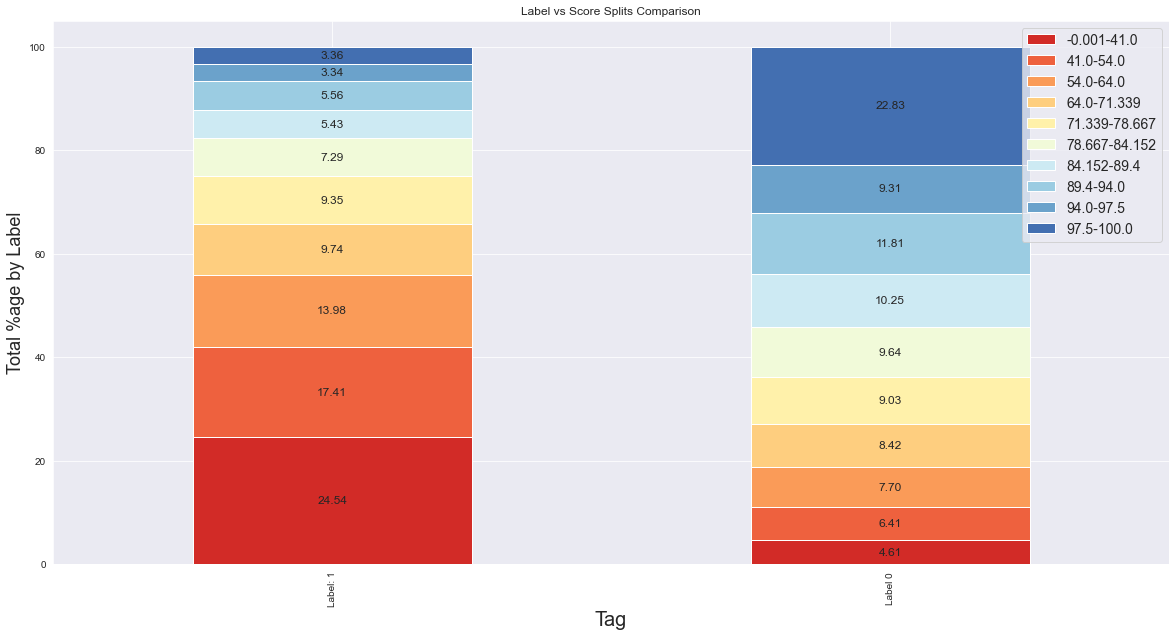

In [474]:
sns.set_style()
sns.set_style("dark")

plt.rcParams["figure.figsize"] = (20,10)

ax=df.set_index('Range').T.plot.bar(stacked=True, color = pal, grid=True)

plt.title("Label vs Score Splits Comparison")

for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{height:.2f}'  
    
    label_x = x + width / 2
    label_y = (y + height / 2)

    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=12)
    
ax.legend(loc='upper right')    
ax.set_ylabel("Total %age by Label", fontsize=18)
ax.set_xlabel("Tag", fontsize=20)
plt.show()

In [ ]:
from collections import OrderedDict
from multiprocessing import cpu_count, Pool
import numpy as np

_N_CORES = cpu_count() - 1


class _SAResult:
    """ Storage for Sensitivity Analysis results"""
    def __init__(self):
        self._ts = OrderedDict()

    def add(self, value, df):
        """ Add returned probabilities for a given value 

        Args:
            value (:obj:`number`) 
                Value of the feature the predictions were made on
            df (:obj:`iterable`) 
                Probabilities
        """
        self._ts[value] = df

    def __iter__(self):
        return (v for v in self._ts.items())


class Analyser:
    """ Perform sensitivity analysis on any model in sklearn

    Args:
        model (:obj:`sklearn.Model`) 
            The model object
        df (:obj:`pandas.DataFrame`)
            Result of running DataFrame.describe() on the target dataset.
            The 'std' row should be dropped before running.
        predict (:obj:`function|method`)
            Function for running the prediction on. Example: model.predict
        get_result (:obj:`function|method`)
            Function for filtering the raw results as returned by the model
            upon running predict.
    """
    def __init__(self, model, df, predict, get_result):
        self._model = model
        self._df = df
        self._predict = predict
        self._get_result = get_result

    def run_on_features(self, features, steps=100, multicore=True):
        """ Run sensitivity analysis on a set of features.
        
        Args:
            features (:obj:`iterable`)
                Features to analyse. All values should be strings.
            steps (:obj:`int`, :optional)
                Number of data points between min and max to predict on. Default is 100.
            multicore (:obj:`bool`, :optional)
                Set this to False to run the predictions on a single process.

        Returns:
            Iterable of tuples (feature, results), where results is a _SAResult object
        """
        if multicore:
            args = ((feature, steps) for feature in features)

            with Pool(_N_CORES) as pool:
                results = pool.starmap(self.run_on_feature, args)
        else:
            results = []
            for feature in features:
                results.append(self.run_on_feature(feature, steps))

        return zip(features, results)

    def run_on_feature(self, feature, steps=100):
        """ Run sensitivity analysis on a single feature.

        Args:
            feature (:obj:`str`)
                Feature to analyse.
            steps (:obj:`int`, :optional)
                Number of data points between min and max to predict on. Default is 100.

        Returns:
            _SAResult object.
        """
        result = _SAResult()

        vals = self._get_step_values(feature, steps)
        df = self._df.copy()

        for val in vals:
            df[feature] = val
            r = self._get_result(self._predict(df))
            result.add(val, r)

        return result

    def _get_step_values(self, feature, steps):
        fd = self._df[feature]

        return np.linspace(min(fd), max(fd), num=steps)

